# CHAPTER 4

# Section 1
Learning how to represent common data formats into usable tensors for Deep Learning models.

In [1]:
import imageio
import torch
from matplotlib import pyplot as plt

In [2]:
# imageio can be used to easily read in PNG and JPG images into tensors
img = imageio.imread('/Users/ramanshsharma/Downloads/oldnotusedanymore_goodlinkedinpic.png')
img.shape

(1024, 768, 3)

In [3]:
type(img)

imageio.core.util.Array

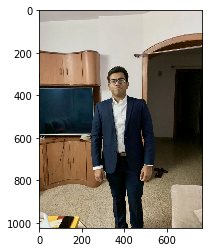

In [4]:
plt.imshow(img)

In [5]:
arr = torch.from_numpy(img)
arr.shape # H x W x C

torch.Size([1024, 768, 3])

In [6]:
arr = arr.permute(2, 0, 1)
arr.shape # C x H x W

torch.Size([3, 1024, 768])

## example thing

In [7]:
arr = arr.float()
arr /= 255.
arr # normalized

tensor([[[0.7059, 0.7059, 0.7059,  ..., 0.8667, 0.8667, 0.8667],
         [0.7059, 0.7059, 0.7059,  ..., 0.8667, 0.8667, 0.8667],
         [0.7059, 0.7059, 0.7059,  ..., 0.8667, 0.8667, 0.8667],
         ...,
         [0.8667, 0.8627, 0.8549,  ..., 0.6196, 0.6157, 0.6078],
         [0.8706, 0.8706, 0.8667,  ..., 0.6196, 0.6118, 0.6000],
         [0.8745, 0.8745, 0.8706,  ..., 0.6196, 0.6039, 0.5922]],

        [[0.6745, 0.6745, 0.6745,  ..., 0.8471, 0.8471, 0.8471],
         [0.6745, 0.6745, 0.6745,  ..., 0.8471, 0.8471, 0.8471],
         [0.6745, 0.6745, 0.6745,  ..., 0.8471, 0.8471, 0.8471],
         ...,
         [0.8863, 0.8824, 0.8745,  ..., 0.5569, 0.5569, 0.5529],
         [0.8941, 0.8941, 0.8863,  ..., 0.5569, 0.5529, 0.5451],
         [0.8980, 0.8980, 0.8902,  ..., 0.5569, 0.5451, 0.5373]],

        [[0.6627, 0.6627, 0.6627,  ..., 0.8353, 0.8353, 0.8353],
         [0.6627, 0.6627, 0.6627,  ..., 0.8353, 0.8353, 0.8353],
         [0.6627, 0.6627, 0.6627,  ..., 0.8353, 0.8353, 0.

In [8]:
# practicing loading multiple images from disk

In [9]:
import os
data_dir = "../Chapter_4/imgs/"
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']

In [10]:
batch = torch.zeros(3, 3, 1800, 2880, dtype=torch.uint8) # most common bit size for images is uint8

In [11]:
batch.size()

torch.Size([3, 3, 1800, 2880])

In [12]:
for i, img in enumerate(filenames):
    read = imageio.imread(os.path.join(data_dir, img))
    arr = torch.from_numpy(read)
    arr = arr.permute(2, 0, 1) # reshaping as earlier to C x H x W
    # some images have more than 3 channels. So to remove other than 3 channels
    arr = arr[:3].to(torch.uint8)
    batch[i] = arr

In [13]:
# preprocessing that is requires in neural networks
batch = batch.float()
print(batch.dtype)
# either we can do
# batch /= 255.0 for image normalization
# or

for c in range(batch.shape[1]): # over all channels
    mean = torch.mean(batch[:, c]) # mean over all examples, over channel c
    std = torch.std(batch[:, c]) # std over all examples, over channel c
    batch[:, c] = (batch[:, c] - mean) / std


torch.float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


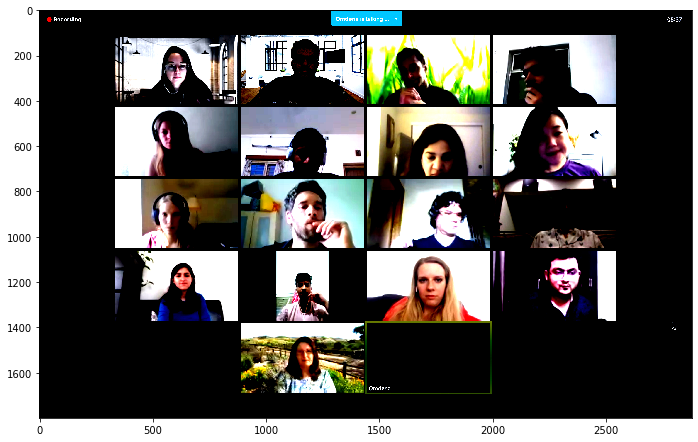

In [14]:
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
plt.imshow(batch[2].permute(1, 2, 0))

In [15]:
# practicing one-hot vectors

In [16]:
a = torch.tensor([0, 1, 2, 4, 4, 5, 6, 7, 8, 9], dtype=torch.long)

In [17]:
a = a.long()
print(a.dtype)
a.shape

torch.int64


torch.Size([10])

In [18]:
onehotvec = torch.zeros(a.shape[0], 13)
onehotvec.shape

torch.Size([10, 13])

In [19]:
a.unsqueeze(1)

tensor([[0],
        [1],
        [2],
        [4],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

In [20]:
onehotvec.scatter_(1, a.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## Exploring advanced boolean indexing

In [21]:
a = torch.rand(1, 1000)
a

tensor([[9.6958e-01, 2.2229e-01, 1.9998e-01, 7.0290e-01, 4.8576e-01, 7.1209e-01,
         5.3010e-01, 9.1519e-02, 3.2534e-01, 4.3805e-01, 3.0896e-01, 4.8051e-01,
         3.0623e-01, 7.7812e-01, 8.2221e-01, 6.1831e-01, 5.0106e-01, 7.8890e-02,
         4.2881e-01, 6.5004e-01, 7.8062e-01, 9.1316e-01, 3.9894e-01, 7.1473e-01,
         1.3505e-01, 1.3151e-01, 8.3635e-01, 6.3744e-01, 8.2943e-01, 9.9169e-01,
         8.2359e-01, 7.0870e-02, 2.3323e-01, 2.3182e-01, 8.1768e-01, 5.9915e-01,
         8.2569e-01, 7.3862e-01, 8.4182e-01, 8.7615e-01, 1.7221e-01, 8.0858e-01,
         5.3494e-01, 6.8105e-01, 3.4524e-02, 3.7073e-01, 9.4220e-01, 9.5801e-02,
         5.1146e-01, 1.3722e-01, 7.8650e-01, 3.6907e-02, 5.8322e-01, 6.4119e-01,
         9.9016e-01, 5.4642e-01, 9.3198e-01, 9.1487e-01, 6.3417e-02, 8.8450e-01,
         5.3754e-01, 5.1503e-01, 9.5846e-02, 6.6443e-01, 9.9589e-01, 8.4790e-01,
         7.4787e-01, 2.4315e-01, 7.5564e-01, 6.2753e-01, 4.5294e-01, 5.2236e-01,
         6.8721e-01, 5.9345e

In [22]:
a = a < 0.5
a.shape, a.dtype, torch.sum(a, 1)

(torch.Size([1, 1000]), torch.bool, tensor([494]))

In [26]:
torch.cat([torch.tensor([1, 2, 3, 4]), torch.tensor([12, 13, 45, 56])], axis=0)

tensor([ 1,  2,  3,  4, 12, 13, 45, 56])